<a href="https://colab.research.google.com/github/DataCrusade1999/Qgraph/blob/main/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install feyn

In [39]:
import numpy as np
import pandas as pd
import feyn
import matplotlib.pyplot as plt

In [56]:
california_housing_train=pd.read_csv('/content/sample_data/california_housing_train.csv')
california_housing_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [57]:
california_housing_train=california_housing_train.dropna()

In [58]:
train, test = feyn.tools.split(california_housing_train, ratio=(80,20))

In [59]:
ql = feyn.QLattice(url="https://qlattice.abzu.ai/qlattice-f7261e97", api_token="5be2fb0c8e054099bfa3530d13ac461b")
ql.reset()

In [60]:
types = {}

for var in train.columns:
    if train[var].dtype == 'object':
        types[var] = 'categorical'
        
types

{}

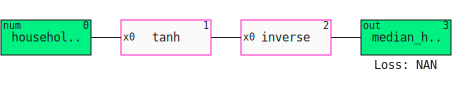

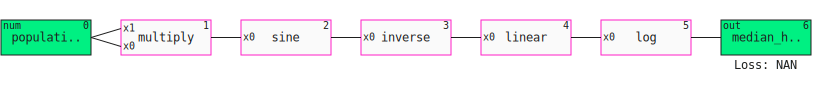

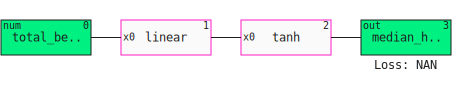

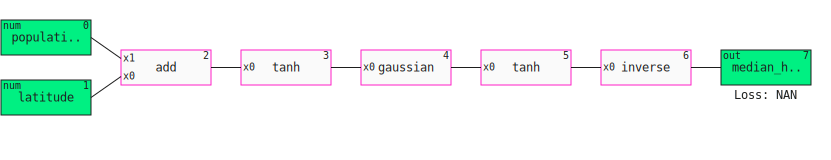

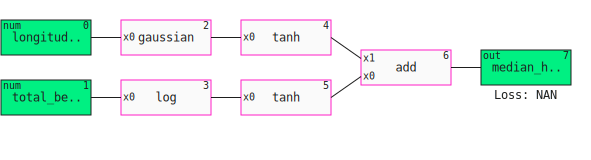

In [61]:
target = 'median_house_value'

qgraph = ql.get_regressor(registers=train.columns, output=target, max_depth=5, stypes=types)
qgraph.head()

In [62]:
qgraph.fit(train, loss_function=feyn.losses.squared_error, threads=4)

QGraph (depth<=5) <head: 1023>

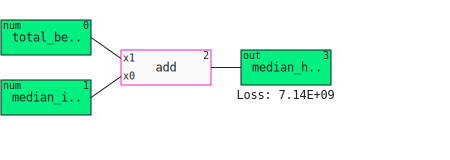

In [63]:
best = qgraph[0]
best

In [64]:
ql.update(best)

In [65]:
for _ in range(5):
    qgraph.fit(train, loss_function=feyn.losses.squared_error, threads=4)
    best = qgraph[0]
    ql.update(best)

In [66]:
pred_train = best.predict(train)
pred_test = best.predict(test)

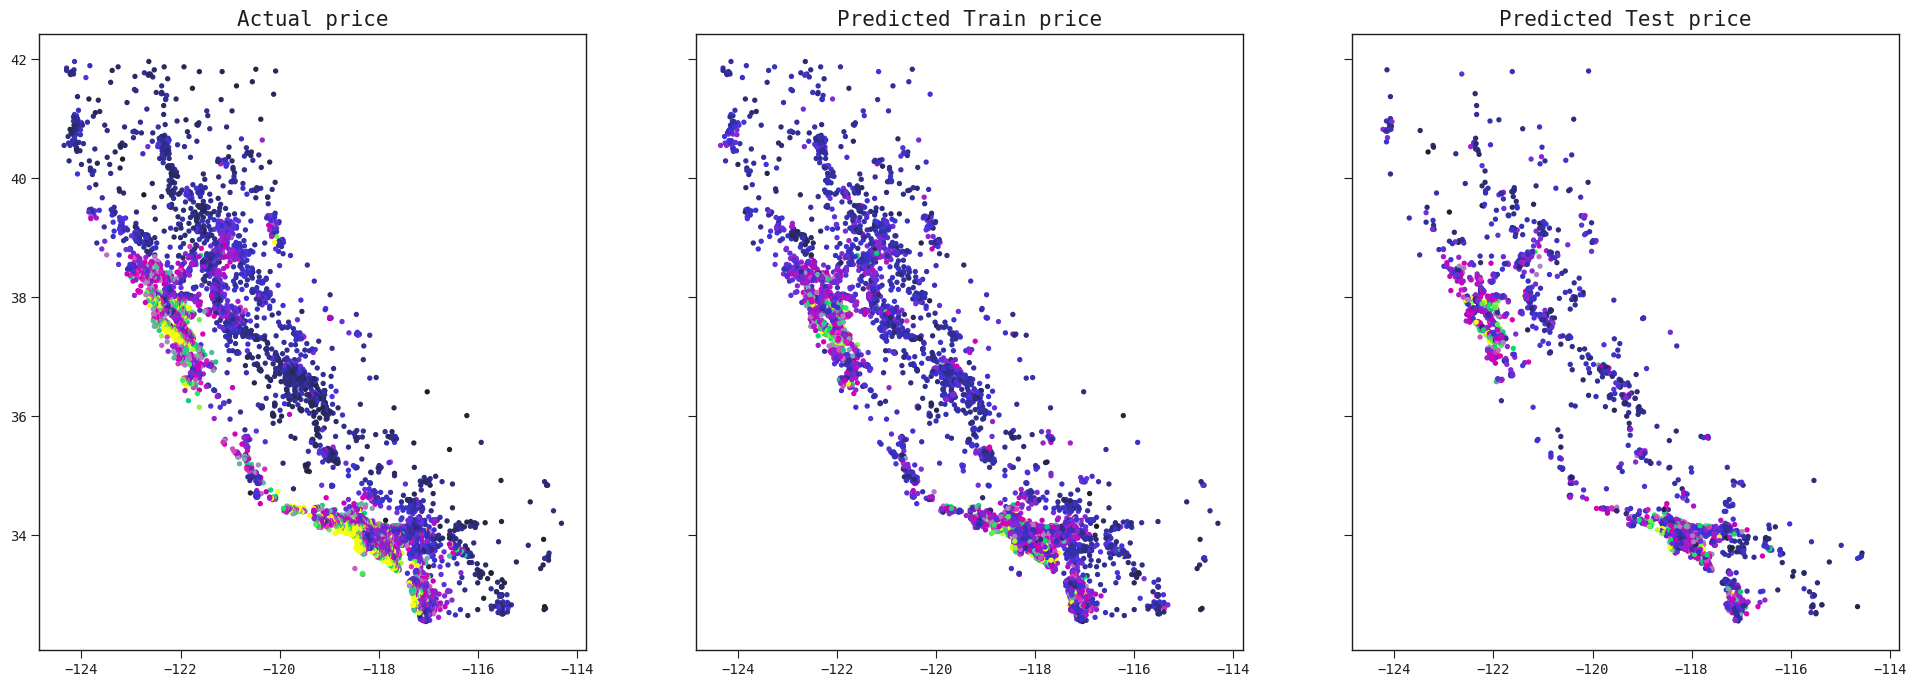

In [68]:

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(24,8))

ax1.scatter(california_housing_train["longitude"],california_housing_train["latitude"], c=california_housing_train[target], s=8)
ax1.set_title('Actual price')
ax2.scatter(train["longitude"], train["latitude"], c=pred_train, s=8)
ax2.set_title('Predicted Train price')
ax3.scatter(test["longitude"], test["latitude"], c=pred_test, s=8)
ax3.set_title('Predicted Test price')
plt.show()